In [6]:
###########################################################################################################################
#
# Antonio Vieira da Silva Neto - NUSP  5690149 - Doutorando em Ciências
# Henrique Lefundes da Silva   - NUSP 11808280 - Pesquisador de Iniciação Científica e Graduando em Engenharia Elétrica
#
# Escola Politécnica da Universidade de São Paulo
# Programa de Pós-Graduação em Engenharia Elétrica
# Departamento de Engenharia de Computação e Sistemas Digitais
# Área de Concentração: Confiabilidade e Segurança
#
# Tese de Doutorado: Safety ArtISt: Um Método para a Garantia de Segurança Crítica de Sistemas com Inteligência Artificial
#
# Estudo de Caso 4 - Sistema de Controle de Frenagem de Veículos
#
# Arquivo para geração do modelo base de IA
#
###########################################################################################################################

###########################################################################################################################
#
# Tabela de Controle de Versões do Código
#
#--------|-------------------|------------------------------|--------------------------------------------------------------
# Versão | Data (dd/mm/aaaa) | Autor                        | Descrição da Versão
#--------|-------------------|------------------------------|--------------------------------------------------------------
#   01   |    28/07/2022     | Henrique Lefundes da Silva   | Versão inicial.
#--------|-------------------|------------------------------|--------------------------------------------------------------
###########################################################################################################################

# Importação de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from stratify import train_test_split_stratified
from stratify import StratifyData

In [7]:
# Pré-processamento dos dados (pre_processing)

def pre_processing(address):
    dataColumns = ["Distância Ruidosa", "Velocidade Ruidosa", "Capacidade de Frenagem Ruidosa",
                    "Decisão"]
    
    dataset = pd.read_csv(address, header = None, names = dataColumns)

    return dataset

In [8]:
# Função criada para automatizar o processo de testes para diferentes datasets, 
# caso queira testar a árvore no dataset de testes 1, basta chamar automatic_test(1)
# Nome padrão dos datasets de teste: DatasetTX, onde X corresponde a numeração do dataset

def automatic_test(dataset_test_number): 
    # Lê base de dados 
    pp_dataset_test = pre_processing(f"./Dataset/DatasetT{dataset_test_number}.csv")
    
    # Define entradas e saída
    pp_data_inputs_test = pp_dataset_test.drop(columns = ['Decisão'])
    pp_data_outputs_test = pp_dataset_test[['Decisão']]

    # Valores preditos pela árvore treinada
    predicted_apply_brakes = final_decision_tree.predict(pp_data_inputs_test)

    # Métricas de performance
    finalAccuracy = accuracy_score(pp_data_outputs_test, predicted_apply_brakes)
    finalPrecision = precision_score(pp_data_outputs_test, predicted_apply_brakes)
    finalRecall = recall_score(pp_data_outputs_test, predicted_apply_brakes)
    finalF1 = f1_score(pp_data_outputs_test, predicted_apply_brakes)
    finalConfusionMatrix = confusion_matrix(pp_data_outputs_test, predicted_apply_brakes)
    finalClassificationReport = classification_report(pp_data_outputs_test, predicted_apply_brakes)

    # Imprime resultados finais
    print(f'******** Resultados DatasetT{dataset_test_number} ********')
    print('Accuracy:', finalAccuracy*100)
    print('Precision:', finalPrecision*100)
    print('Recall:', finalRecall*100)
    print('F1-Score:', finalF1*100)
    print(finalConfusionMatrix)
    ConfusionMatrixDisplay(finalConfusionMatrix).plot()
    plt.show()

In [9]:
# Realiza a leitura do arquivo CSV
# O arquivo se encontra numa pasta dentro do diretório deste programa:
# ./Árvore de Decisão/Dataset/Dataset.csv
pp_dataset = pre_processing("./Dataset/DatasetT&V.csv")
print(pp_dataset)

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa  \
0               0.000000            0.000000                          1.3950   
1               0.000000            0.000000                          1.1625   
2               1.579846            0.000000                          0.9300   
3               0.282185            0.000000                          0.7800   
4               0.394876            0.000000                          0.6500   
...                  ...                 ...                             ...   
57280        2000.433820           26.977928                          1.3950   
57281        1999.988138           28.886308                          1.1625   
57282        1998.246886           28.409583                          0.9300   
57283        2002.044078           27.358991                          0.7800   
57284        1998.055064           27.991858                          0.6500   

       Decisão  
0          1.0  
1    

In [10]:
#Define as entradas e as saídas do dataset
pp_data_inputs = pp_dataset.drop(columns = ['Decisão'])
print(pp_data_inputs)

pp_data_outputs = pp_dataset[['Decisão']]
print(pp_data_outputs)


       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0               0.000000            0.000000                          1.3950
1               0.000000            0.000000                          1.1625
2               1.579846            0.000000                          0.9300
3               0.282185            0.000000                          0.7800
4               0.394876            0.000000                          0.6500
...                  ...                 ...                             ...
57280        2000.433820           26.977928                          1.3950
57281        1999.988138           28.886308                          1.1625
57282        1998.246886           28.409583                          0.9300
57283        2002.044078           27.358991                          0.7800
57284        1998.055064           27.991858                          0.6500

[57285 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

In [11]:
random_state = 1

# Definição dos hiperparâmetros

criterion = ['entropy', 'gini']

splitter = ['best', 'random']

max_depth = [int(x) for x in np.arange(1, 22, step = 2)] # max_depth já limitado

min_samples_split = [int(x) for x in np.arange(2, 18, step = 3)]

min_samples_leaf = [int(x) for x in np.arange(1, 18, step = 3)]

min_weight_fraction_leaf = [float(x) for x in np.linspace(0,0.5,5)] # não houve 1 RandomSearch que fosse diferente de 0

max_leaf_nodes = [int(x) for x in np.arange(200, 510, step = 10)]
max_leaf_nodes.append(None)

max_features = [int(x) for x in np.arange(1, 4, step = 1)] 
max_features.append('log2')
max_features.append('sqrt')
max_features.append(None)

combinations = len(criterion)*len(splitter)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(min_weight_fraction_leaf)*len(max_leaf_nodes)*len(max_features)

print('Número de combinações possíveis:', combinations)

hyperparameters_settings = {'criterion'                : criterion,
                            'splitter'                 : splitter,
                            'max_depth'                : max_depth,
                            'min_samples_split'        : min_samples_split,
                            'min_samples_leaf'         : min_samples_leaf,
                            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                            'max_leaf_nodes'           : max_leaf_nodes,
                            'max_features'             : max_features
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 
n_iter = 2500

print('Tempo estimado de processamento:', round((n_iter*10)/140,1), 'segundos')


Número de combinações possíveis: 1520640
{'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'min_samples_split': [2, 5, 8, 11, 14, 17], 'min_samples_leaf': [1, 4, 7, 10, 13, 16], 'min_weight_fraction_leaf': [0.0, 0.125, 0.25, 0.375, 0.5], 'max_leaf_nodes': [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, None], 'max_features': [1, 2, 3, 'log2', 'sqrt', None]}
Tempo estimado de processamento: 178.6 segundos


In [70]:
# Criação da árvore de decisão
starting_decision_tree = DecisionTreeClassifier()

# Optimização dos hiperparâmetros com RandomSearch
dtTries = RandomizedSearchCV(estimator = starting_decision_tree, param_distributions = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 3, n_jobs = -1, n_iter = n_iter)

# Teste com os hiperparâmetros encontrados
dtTries.fit(pp_data_inputs, pp_data_outputs)


Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=2500, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21],
                                        'max_features': [1, 2, 3, 'log2',
                                                         'sqrt', None],
                                        'max_leaf_nodes': [200, 210, 220, 230,
                                                           240, 250, 260, 270,
                                                           280, 290, 300, 310,
                                                           320, 330, 340, 350,
                                                           360, 370, 380, 390,
                                                           400, 410, 420, 430,
    

In [73]:
# Imprime valores ótimos dos hiperparâmetros
print(dtTries.best_params_)
print(k_fold,'- Fold Best recall-score: ', dtTries.best_score_*100)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_leaf_nodes': 250, 'max_features': 2, 'max_depth': 9, 'criterion': 'gini'}
10 - Fold Best recall-score:  96.1438015098809


In [74]:
# Segunda iteração

splitter = ['best']

min_weight_fraction_leaf = [0]

min_samples_split = [int(x) for x in np.arange(9, 14, step = 1)]

min_samples_leaf = [int(x) for x in np.arange(1, 5, step = 1)]

max_leaf_nodes = [int(x) for x in np.arange(225, 275, step = 5)]

max_features = [2] 

max_depth = [int(x) for x in np.arange(7, 12, step = 1)]

criterion = ['gini']

hyperparameters_settings = {'criterion'                : criterion,
                            'splitter'                 : splitter,
                            'max_depth'                : max_depth,
                            'min_samples_split'        : min_samples_split,
                            'min_samples_leaf'         : min_samples_leaf,
                            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                            'max_leaf_nodes'           : max_leaf_nodes,
                            'max_features'             : max_features
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 

{'criterion': ['gini'], 'splitter': ['best'], 'max_depth': [7, 8, 9, 10, 11], 'min_samples_split': [9, 10, 11, 12, 13], 'min_samples_leaf': [1, 2, 3, 4], 'min_weight_fraction_leaf': [0], 'max_leaf_nodes': [225, 230, 235, 240, 245, 250, 255, 260, 265, 270], 'max_features': [2]}


In [75]:
# Optimização dos hiperparâmetros com GridSearch
dtTries = GridSearchCV(estimator = starting_decision_tree, param_grid = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 3, n_jobs = -1)

# Teste com os hiperparâmetros encontrados
dtTries.fit(pp_data_inputs, pp_data_outputs)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 8, 9, 10, 11],
                         'max_features': [2],
                         'max_leaf_nodes': [225, 230, 235, 240, 245, 250, 255,
                                            260, 265, 270],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [9, 10, 11, 12, 13],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best']},
             scoring='recall', verbose=3)

In [76]:
# Imprime valores ótimos dos hiperparâmetros
print(dtTries.best_params_)
print(k_fold,'- Fold Best recall-score: ', dtTries.best_score_*100)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 2, 'max_leaf_nodes': 245, 'min_samples_leaf': 2, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}
10 - Fold Best recall-score:  96.08235987664132


In [12]:
# Árvore de decisão final
final_decision_tree = DecisionTreeClassifier(criterion = 'gini', 
                                            max_depth = 9, 
                                            max_features = None, 
                                            max_leaf_nodes = 550, 
                                            min_samples_leaf = 3, 
                                            min_samples_split = 2,
                                            min_weight_fraction_leaf = 0, 
                                            splitter = 'best')

# Holdout test
inputsTrain, inputsTest, outputsTrain, outputsTest = train_test_split(pp_data_inputs, 
                                                                      pp_data_outputs,
                                                                      test_size = 0.2)

final_decision_tree.fit(inputsTrain, outputsTrain)

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_decision_tree.predict(inputsTest)

# Métricas de performance
finalAccuracy = accuracy_score(outputsTest, predicted_apply_brakes)
finalPrecision = precision_score(outputsTest, predicted_apply_brakes)
finalRecall = recall_score(outputsTest, predicted_apply_brakes)
finalF1 = f1_score(outputsTest, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(outputsTest, predicted_apply_brakes)
finalClassificationReport = classification_report(outputsTest, predicted_apply_brakes)

plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 100
# Plot da árvore de decisão treinada, comentado para diminuir tempo de execução
# plot_tree(final_decision_tree)
# plt.show()

Accuracy: 99.33665008291874
Precision: 96.38009049773756
Recall: 96.73024523160763
F1-Score: 96.55485040797824
[[10316    40]
 [   36  1065]]


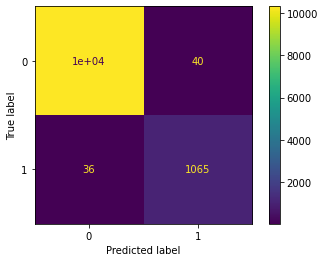

In [13]:
# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

******** Resultados DatasetT1 ********
Accuracy: 99.3226848215065
Precision: 96.74782608695652
Recall: 96.51283830673144
F1-Score: 96.63018933472294
[[51334   187]
 [  201  5563]]


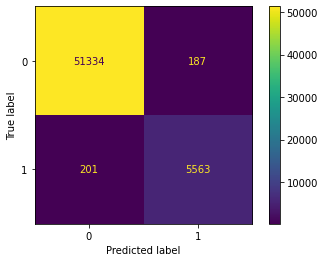

******** Resultados DatasetT2 ********
Accuracy: 99.31395653312386
Precision: 96.38970461219554
Recall: 96.80777238029147
F1-Score: 96.59828615943911
[[51312   209]
 [  184  5580]]


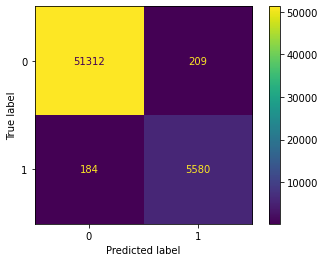

******** Resultados DatasetT3 ********
Accuracy: 99.35061534433098
Precision: 96.83808200138986
Recall: 96.70367800138793
F1-Score: 96.77083333333334
[[51339   182]
 [  190  5574]]


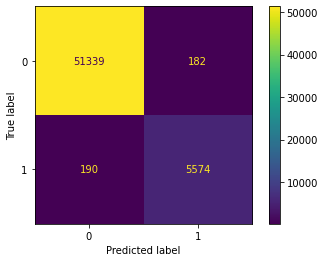

In [14]:
# Testes para DatasetT1, DatasetT2 e DatasetT3
automatic_test(1)
automatic_test(2)
automatic_test(3)

c:\Users\R2D2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Capacidade de Frenagem
- Distancia
- Velocidade
Feature names seen at fit time, yet now missing:
- Capacidade de Frenagem Ruidosa
- Distância Ruidosa
- Velocidade Ruidosa

  warnings.warn(message, FutureWarning)


******** Resultados dataset sem ruido ********
Accuracy: 99.44837217421664
Precision: 97.35744089012516
Recall: 97.15475364330327
F1-Score: 97.25599166377215
[[51369   152]
 [  164  5600]]


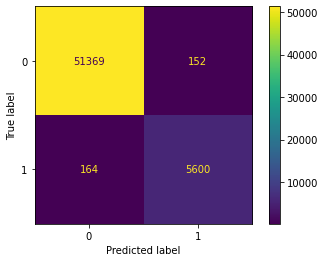

In [15]:
# Teste para dataset sem ruído 
dataColumns = ['Distancia Ruidosa', 'Velocidade Ruidosa', 'Capacidade de Frenagem Ruidosa', 'Distancia', 'Velocidade', 
                'Capacidade de Frenagem', 'Decisao', 'Aceleracao', 'AW', 'AG', 'VH', 'VC', 'V50', 'DS', 'Decisao Ruidosa', 
                'Aceleracao Ruidosa', 'AW Ruidosa', 'AG Ruidosa', 'VH Ruidosa', 'VC Ruidosa', 'V50 Ruidosa', 'DS Ruidosa']
    
pp_dataset_test = pd.read_csv("./Dataset/DatasetT&VDebug.csv", header = None, names = dataColumns)

pp_data_inputs_test = pp_dataset_test[['Distancia', 'Velocidade', 'Capacidade de Frenagem']]

pp_data_outputs_test = pp_dataset_test[['Decisao']]

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_decision_tree.predict(pp_data_inputs_test)

# Métricas de performance
finalAccuracy = accuracy_score(pp_data_outputs_test, predicted_apply_brakes)
finalPrecision = precision_score(pp_data_outputs_test, predicted_apply_brakes)
finalRecall = recall_score(pp_data_outputs_test, predicted_apply_brakes)
finalF1 = f1_score(pp_data_outputs_test, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(pp_data_outputs_test, predicted_apply_brakes)
finalClassificationReport = classification_report(pp_data_outputs_test, predicted_apply_brakes)

# Imprime resultados finais
print(f'******** Resultados dataset sem ruido ********')
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()  

<h1>Fim dos testes com dataset normal</h1>

<h1>Início dos testes com dataset estratificado</h1>

In [16]:
pp_dataset = pre_processing("./Dataset/DatasetT&V.csv")
pp_dataset = StratifyData(pp_dataset, 0.4, 0.75, 1, False) #Gera outro dataset, utilizando 40% do dataset original, com 75% das saídas iguais a 0
print(pp_dataset) # Note que shuffle = False, então temos diversos 1 no ínicio e os 0 nos fim

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa  \
0             161.287901           26.676714                          0.7800   
1             219.200647           25.886505                          1.1625   
2             240.002120           16.531255                          0.7800   
3              10.809129            7.990000                          0.6500   
4              30.958756           26.606893                          1.1625   
...                  ...                 ...                             ...   
22909        1478.319317            1.488335                          1.1625   
22910        1898.499837           22.812874                          0.7800   
22911        1660.858790           15.550167                          1.1625   
22912         253.240000            4.602194                          1.1625   
22913         647.826139            8.614582                          1.3950   

       Decisão  
0          1.0  
1    

In [17]:
pp_data_inputs = pp_dataset.drop(columns = ['Decisão'])
print(pp_data_inputs) #Entradas

pp_data_outputs = pp_dataset[['Decisão']]
print(pp_data_outputs) #Saídas

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0             161.287901           26.676714                          0.7800
1             219.200647           25.886505                          1.1625
2             240.002120           16.531255                          0.7800
3              10.809129            7.990000                          0.6500
4              30.958756           26.606893                          1.1625
...                  ...                 ...                             ...
22909        1478.319317            1.488335                          1.1625
22910        1898.499837           22.812874                          0.7800
22911        1660.858790           15.550167                          1.1625
22912         253.240000            4.602194                          1.1625
22913         647.826139            8.614582                          1.3950

[22914 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

In [16]:
random_state = 1

# Definição dos hiperparâmetros

criterion = ['entropy', 'gini']

splitter = ['best', 'random']

max_depth = [int(x) for x in np.arange(1, 22, step = 2)] # max_depth já foi limitado

min_samples_split = [int(x) for x in np.arange(2, 18, step = 3)]

min_samples_leaf = [int(x) for x in np.arange(1, 18, step = 3)]

min_weight_fraction_leaf = [float(x) for x in np.linspace(0,0.5,5)] # Ajustado o intervalo, o peso máximo aceito é 0.5, entretanto todas as RSearch dão 0

max_leaf_nodes = [int(x) for x in np.arange(200, 510, step = 10)]
max_leaf_nodes.append(None)

max_features = [int(x) for x in np.arange(1, 4, step = 1)] 
max_features.append('log2')
max_features.append('sqrt')
max_features.append(None)

combinations = len(criterion)*len(splitter)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split)*len(min_weight_fraction_leaf)*len(max_leaf_nodes)*len(max_features)

print('Número de combinações possíveis:', combinations)

hyperparameters_settings = {'criterion'                : criterion,
                            'splitter'                 : splitter,
                            'max_depth'                : max_depth,
                            'min_samples_split'        : min_samples_split,
                            'min_samples_leaf'         : min_samples_leaf,
                            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                            'max_leaf_nodes'           : max_leaf_nodes,
                            'max_features'             : max_features
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 

# Número de iterações
n_iter = 500 

print('Tempo estimado de processamento:', round((n_iter*10)/140,1), 'segundos')

Número de combinações possíveis: 1520640
{'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'min_samples_split': [2, 5, 8, 11, 14, 17], 'min_samples_leaf': [1, 4, 7, 10, 13, 16], 'min_weight_fraction_leaf': [0.0, 0.125, 0.25, 0.375, 0.5], 'max_leaf_nodes': [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, None], 'max_features': [1, 2, 3, 'log2', 'sqrt', None]}
Tempo estimado de processamento: 35.7 segundos


In [162]:
# Criação da árvore de decisão
starting_decision_tree = DecisionTreeClassifier()

# Optimização dos hiperparâmetros com RandomSearch
dtTries = RandomizedSearchCV(estimator = starting_decision_tree, param_distributions = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 3, n_jobs = -1, n_iter = n_iter)

# Teste com os hiperparâmetros encontrados
dtTries.fit(pp_data_inputs, pp_data_outputs)


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21],
                                        'max_features': [1, 2, 3, 'log2',
                                                         'sqrt', None],
                                        'max_leaf_nodes': [200, 210, 220, 230,
                                                           240, 250, 260, 270,
                                                           280, 290, 300, 310,
                                                           320, 330, 340, 350,
                                                           360, 370, 380, 390,
                                                           400, 410, 420, 430,
     

In [165]:
print(dtTries.best_params_) 
print(k_fold,'- Fold Best recall-score: ', dtTries.best_score_*100)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_leaf_nodes': 210, 'max_features': 2, 'max_depth': 9, 'criterion': 'entropy'}
10 - Fold Best recall-score:  97.72051783986987


In [167]:
# Segunda iteração

splitter = ['best']

min_weight_fraction_leaf = [0]

min_samples_split = [int(x) for x in np.arange(9, 14, step = 1)]

min_samples_leaf = [int(x) for x in np.arange(2, 7, step = 1)]

max_leaf_nodes = [int(x) for x in np.arange(195, 240, step = 5)]

max_features = [2] 

max_depth = [int(x) for x in np.arange(7, 12, step = 1)]

criterion = ['entropy']

hyperparameters_settings = {'criterion'                : criterion,
                            'splitter'                 : splitter,
                            'max_depth'                : max_depth,
                            'min_samples_split'        : min_samples_split,
                            'min_samples_leaf'         : min_samples_leaf,
                            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                            'max_leaf_nodes'           : max_leaf_nodes,
                            'max_features'             : max_features
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 

{'criterion': ['entropy'], 'splitter': ['best'], 'max_depth': [7, 8, 9, 10, 11], 'min_samples_split': [9, 10, 11, 12, 13], 'min_samples_leaf': [2, 3, 4, 5, 6], 'min_weight_fraction_leaf': [0], 'max_leaf_nodes': [195, 200, 205, 210, 215, 220, 225, 230, 235], 'max_features': [2]}


In [168]:
# Optimização dos hiperparâmetros com GridSearch
dtTries = GridSearchCV(estimator = starting_decision_tree, param_grid = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 3, n_jobs = -1)

# Teste com os hiperparâmetros encontrados
dtTries.fit(pp_data_inputs, pp_data_outputs)

Fitting 10 folds for each of 1125 candidates, totalling 11250 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [7, 8, 9, 10, 11], 'max_features': [2],
                         'max_leaf_nodes': [195, 200, 205, 210, 215, 220, 225,
                                            230, 235],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [9, 10, 11, 12, 13],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best']},
             scoring='recall', verbose=3)

In [169]:
print(dtTries.best_params_)
print(k_fold,'- Fold Best recall-score: ', dtTries.best_score_*100)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'max_leaf_nodes': 195, 'min_samples_leaf': 2, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}
10 - Fold Best recall-score:  98.09771996241653


In [32]:
final_decision_tree = DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = 9, 
                                            max_features = 2, 
                                            max_leaf_nodes = 195, 
                                            min_samples_leaf = 2, 
                                            min_samples_split = 11,
                                            min_weight_fraction_leaf = 0, 
                                            splitter = 'best')

# Holdout test
inputsTrain, inputsTest, outputsTrain, outputsTest = train_test_split_stratified(data = pp_dataset, 
                                                                                test_size = 0.8, 
                                                                                prop_zeros = 0.5, 
                                                                                random_state = 1, 
                                                                                shuffle = True) # 20% dos dados para teste, com 50% das saídas sendo 0

final_decision_tree.fit(inputsTrain, outputsTrain)

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_decision_tree.predict(inputsTest)

# Métricas de performance
finalAccuracy = accuracy_score(outputsTest, predicted_apply_brakes)
finalPrecision = precision_score(outputsTest, predicted_apply_brakes)
finalRecall = recall_score(outputsTest, predicted_apply_brakes)
finalF1 = f1_score(outputsTest, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(outputsTest, predicted_apply_brakes)

Accuracy: 98.35251759314822
Precision: 95.30655391120507
Recall: 98.256320836966
F1-Score: 96.75896115046146
[[13521   222]
 [   80  4508]]


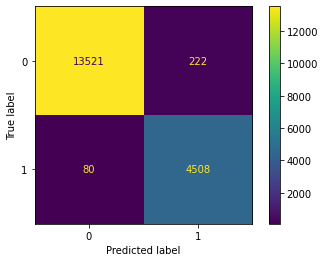

In [33]:
# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

******** Resultados DatasetT1 ********
Accuracy: 98.25085100811731
Precision: 86.40672782874617
Recall: 98.03955586398334
F1-Score: 91.85630689206764
[[50632   889]
 [  113  5651]]


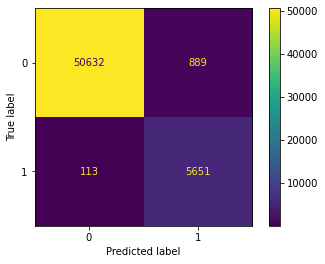

******** Resultados DatasetT2 ********
Accuracy: 98.17404207035001
Precision: 85.84017016104526
Recall: 98.02220680083276
F1-Score: 91.52762028187266
[[50589   932]
 [  114  5650]]


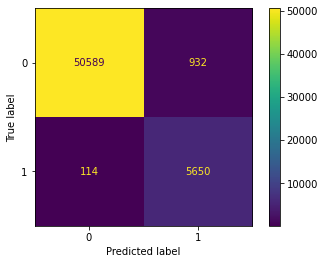

******** Resultados DatasetT3 ********
Accuracy: 98.2089552238806
Precision: 86.21216753286457
Recall: 97.84871616932685
F1-Score: 91.66260360799609
[[50619   902]
 [  124  5640]]


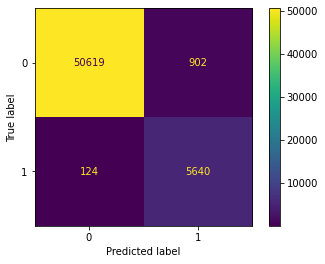

In [34]:
automatic_test(1)
automatic_test(2)
automatic_test(3)